<a href="https://colab.research.google.com/github/ThangDoan2001/API-Python-Learn/blob/master/PNorm_CosineSimilarity_BackgroundSubtraction_StereoMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Các bạn dùng link này lấy data để hoàn thành HW nhé:** https://drive.google.com/file/d/1YEP-CT4KTPzqDBbQeWDtsCI9uqaxRDFK/view?usp=sharing

## HW1

### HW1.1 

p-norm của một vector $v=(v_1, v_2, ..., v_n), v \in R^n $ được định nghĩa như sau $||v||_p = \sqrt[p]{v_1^p + v_2^p + ... + v_n^p}$. Viết function nhận 2 giá trị vector và p để trả về giá trị p-norm tương ứng. (Khi p=2, còn được gọi là Euclidean norm) **(Không dùng hàm nump.linalg.norm)**

vd: 


```python
v = [1, 2, 3, 3, 1 ]
p = 3
norm(v,p)
>> 4.0
```

VD: KNN trong phân loại

Các loại thông dụng
* p = 1: Manhattan norm hoặc taxicab norm
* p = 2: Euclid norm
* p = vô cùng: Max norm




 **SOLUTION**

In [25]:
# Cách 1: Cho kết quả gần đúng
import numpy as np
v = [1, 2, 3, 3, 1]
p = 3
def norm(v, p):
  array_v = np.array([abs(ev) for ev in v])
  sum = np.sum(array_v**p)  
  res = sum**(1/float(p))
  return res

norm(v, p)
# Kết quả là xấp xỉ do khi tính mũ 1/p cũng tính xấp xỉ

3.9999999999999996

In [26]:
!apt install libmpc-dev
!apt install python3-pip
!pip install gmpy2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmpc-dev is already the newest version (1.1.0-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [27]:
# Cách 2: Cho kết quả chính xác hơn nhưng cần  cài đặt thư viện gmpy2
import numpy as np
import gmpy2
v = [1, 2, 3, 3, 1]
p = 3
def norm(v, p):
  array_v = np.array(v)
  sum = np.sum(array_v**p)
  res = float(gmpy2.root(float(sum), p))
  return res
norm(v, p)

4.0

In [28]:
float(gmpy2.root(64, 3))

4.0

In [29]:
float(64**(1/3.0))

3.9999999999999996

### HW1.2
Viết đoạn code tìm giá trị a,b,c,d trong hệ phương trình dưới đây **(không sử dụng np.linalg.lstsq)**:

$
\begin{align}
3a + 4b - 5c + d &= 10\\
2a + 2b + 2c - d &= 5\\
a -b + 5c - 5d &= 7\\
5a + d &= 4
\end{align}
$

A(T)*A -> symetric matrix vì không phải ma trận A nào cũng khả nghịch 
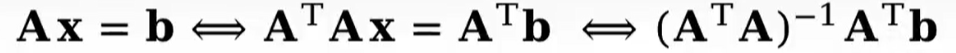

**SOLUTION**

In [30]:
import numpy as np
A = np.array([[3, 4, -5, 1],
              [2, 2, 2, -1],
              [1, -1, 5, -5],
              [5, 0, 0, 1]])
b = np.array([10, 5, 7, 4])

x = np.linalg.inv(A.T@A)@A.T@b
x

array([ 1.24778761,  1.01769912, -0.88495575, -2.23893805])

Dùng x tìm b để check kết quả

In [31]:
A@x

array([10.,  5.,  7.,  4.])

In [32]:
# Kiểm tra kết quả bằng method của numpy
np.linalg.lstsq(A, b.reshape((-1, 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([[ 1.24778761],
        [ 1.01769912],
        [-0.88495575],
        [-2.23893805]]),
 array([], dtype=float64),
 4,
 array([9.23609236, 6.5094485 , 3.4021982 , 1.65732478]))

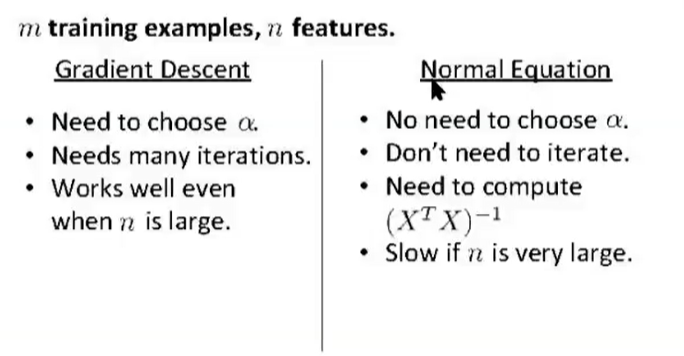

### HW1.3: 
Tìm hiểu về transformation matrix. Áp dụng cho ảnh 2D.
- Tìm matrix A có thể giúp cho xoay ảnh mọi góc $\theta$ trong range [-360, 360]
- Viết function xoay ảnh, nhận input là ảnh và góc xoay $\theta$. Trả về ouput là ảnh đã xoay theo góc $\theta$

Yêu cầu 1: Ảnh đã được xoay có kích thước bằng với ảnh input. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

Yêu cầu 2 **(*)** (Optional): Ảnh đã được xoay có kích thước thay đổi kích thước phù hợp để đảm bảo các thông tin trong ảnh input không bị mất. Các vị trí pixel không có chứa thông tin ảnh gốc có giá trị bằng 0 (màu đen)

VD: rotate(img, 45)


VD output của Yêu cầu 1 khi xoay ảnh 45 độ 

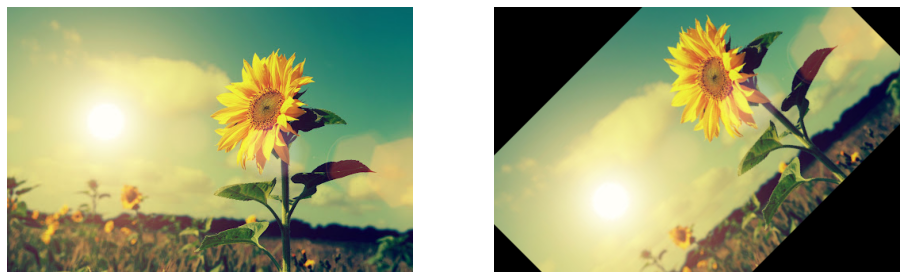

VD output của Yêu cầu 2 khi xoay ảnh 45 độ 

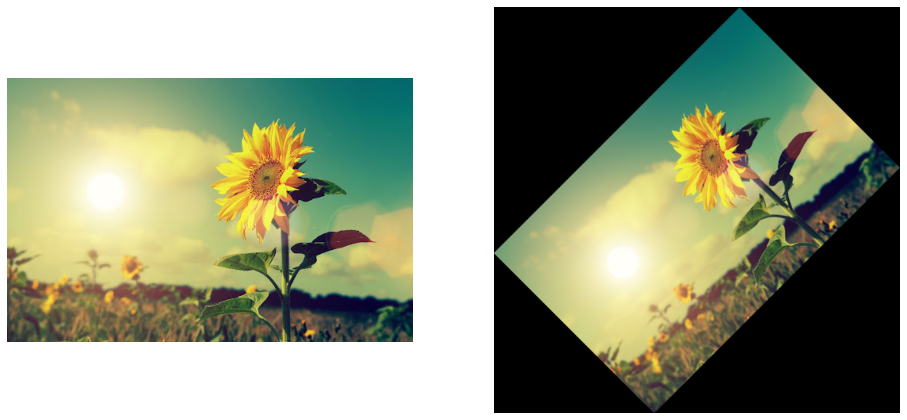

**YÊU CẦU 1**

Xoay ở tâm là giữ được nhiều thông tin nhất

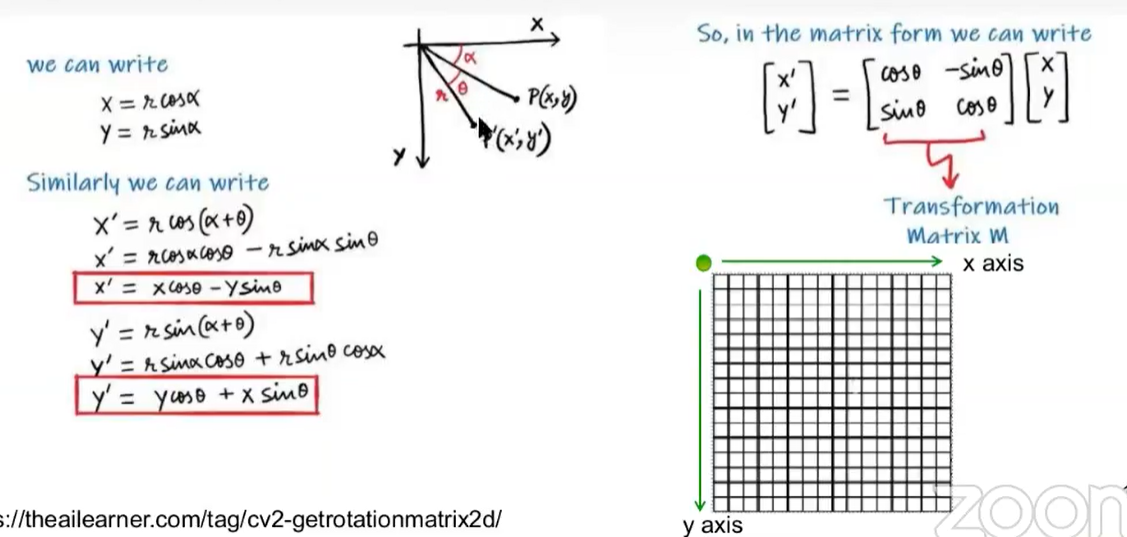

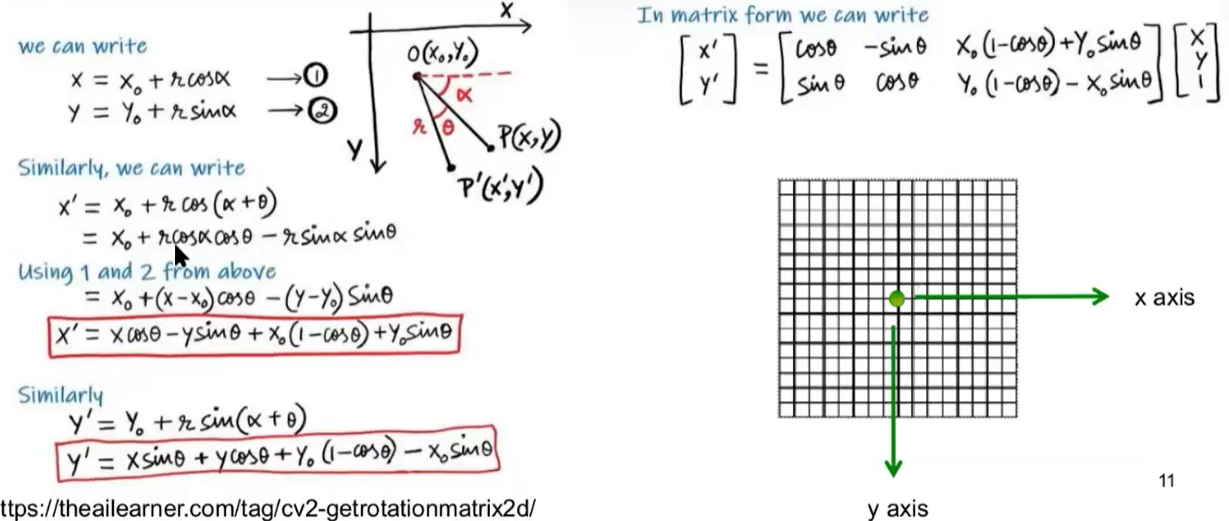

**SOLUTION**

In [33]:
import numpy as np
import cv2

def change_angle_to_radius_uint(angle):
  angle_radius = angle * (np.pi/180)
  return angle_radius

def rotate(src_img, angle_of_rotation, pivot_point, shape_img):
  # Tạo rotation matrix A
  rotation_mat = np.transpose(np.array([[np.cos(angle_of_rotation), -np.sin(angle_of_rotation)],
                                        [np.sin(angle_of_rotation), np.cos(angle_of_rotation)]]))
  # rotation_mat = np.array([[np.cos(angle_of_rotation), -np.sin(angle_of_rotation)], [np.sin(angle_of_rotation), np.cos(angle_of_rotation)]])
  # Transpose thì là quay ngược chiều kim đồng hồ
  h, w = shape_img

  # pivot point: Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
  pivot_point_x = pivot_point[0]
  pivot_point_y = pivot_point[1]

  new_img = np.zeros(src_img.shape, dtype='uint8')

  for p_height in range(h): # h = number of row
    for p_width in range(w): # w = number of col
      # pivot point: xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này
      xy_mat = np.array([[p_width - pivot_point_x], [p_height - pivot_point_y]])

      # Thực hiện xoay theo theta để lấy vị trí mới của một điểm ảnh
      rotate_pos = np.dot(rotation_mat, xy_mat)

      # Đưa về tạo độ theo ảnh input
      new_x = pivot_point_x + int(rotate_pos[0])
      new_y = pivot_point_y + int(rotate_pos[1])

      # Vị trí nào bé hơn 0 sẽ bị loại
      if (0 <= new_x <= w-1) and (0 <= new_y <= h-1):
        # Lấy giá trị trong ảnh input đưa vào vị trí mới 
        new_img[new_y, new_x] = src_img[p_height, p_width]
    
  return new_img

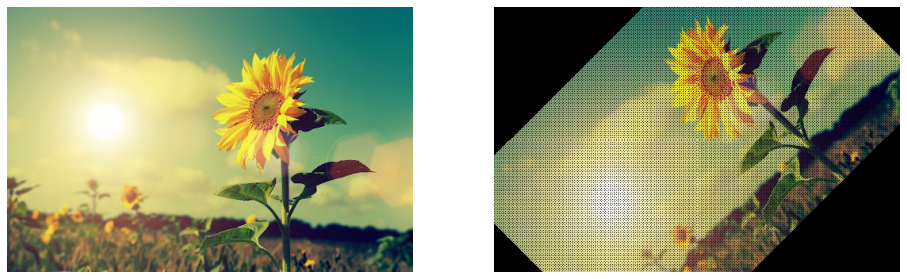

In [34]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW1.3/sun.jpg')
rot_img = rotate(img, change_angle_to_radius_uint(45), (img.shape[1]//2, img.shape[0]//2), img.shape[:2])
fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(rot_img)
plt.axis('off')

plt.show()


In [35]:
!pip install opencv-python 

In [36]:
import cv2
# Sử dụng Opencv
def rotate_without_bound(image, angle):
  # Lấy rotation matrix
  # centor(pivot_point)
  (h, w) = image.shape[:2]
  (cX, cY) = (w//2, h//2)
  # Lấy affine transformation matrix M
  M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
  # Tọa độ tâm, góc, tỉ lệ ảnh mới
  
  return cv2.warpAffine(image, M, (w, h))

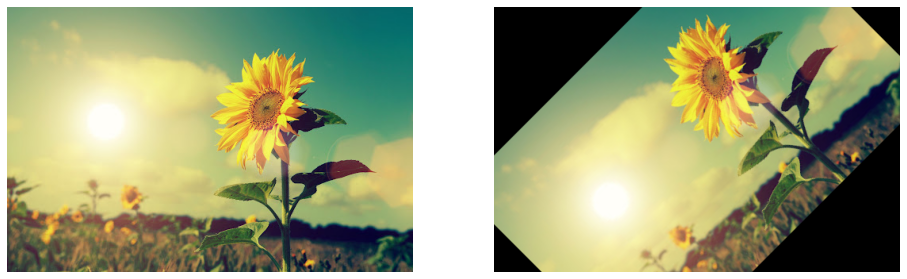

In [37]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW1.3/sun.jpg')
rot_img = rotate_without_bound(img, 45)
fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(rot_img)
plt.axis('off')

plt.show()

**Aliasing Effect**

In [38]:
import numpy as np
import cv2
import math

def change_angle_to_radius_uint(angle):
  angle_radius = angle * (np.pi/180)
  return angle_radius

def three_shears(angle_of_rotation, xy_mat):
  neg_angle_of_rotation = - angle_of_rotation
  # Muốn quay theo đúng như ở trên thì phải lấy góc âm
  shear_mat1 = np.array([[1, -np.tan(neg_angle_of_rotation/2)],
                         [0, 1]])
  shear_mat2 = np.array([[1, 0],
                         [np.sin(neg_angle_of_rotation), 1]])
  shear_mat3 = shear_mat1
  # shear 1
  new_xy = np.dot(shear_mat1, xy_mat)
  new_xy = new_xy.astype(np.int64)

  # shear 2 
  new_xy = np.dot(shear_mat2, new_xy)
  new_xy = new_xy.astype(np.int64)

  # shear 3
  new_xy = np.dot(shear_mat3, new_xy)
  new_xy = new_xy.astype(np.int64)

  return new_xy

def rotate(src_img, angle_of_rotation, pivot_point, shape_img):
  h, w = shape_img

  # pivot point: Điểm được coi là sẽ cố định và xoay ảnh quanh điểm đó
  pivot_point_x = pivot_point[0]
  pivot_point_y = pivot_point[1]

  new_img = np.zeros(src_img.shape, dtype='uint8')

  for p_height in range(h): # h = number of row
    for p_width in range(w): # w = number of col
      # pivot_point: Xem như gốc tọa độ đưa các vị trí trong ảnh theo tọa độ này
      xy_mat = np.array([[p_width - pivot_point_x], [p_height - pivot_point_y]])

      # Thực hiện xoay theo theta để lấy vị trí mới của 1 điểm ảnh
      rotate_pos = three_shears(angle_of_rotation, xy_mat)

      # Đưa về tọa độ theo ảnh input
      new_x = pivot_point_x + int(rotate_pos[0])
      new_y = pivot_point_y + int(rotate_pos[1])

      # Vị trí nào bé hơn 0 sẽ bị loại
      if (0 <= new_x <= w-1) and (0 <= new_y <= h-1):
        # Lấy giá trị trong ảnh input đưa vào vị trí mới
        new_img[new_y, new_x] = src_img[p_height, p_width]
  return new_img

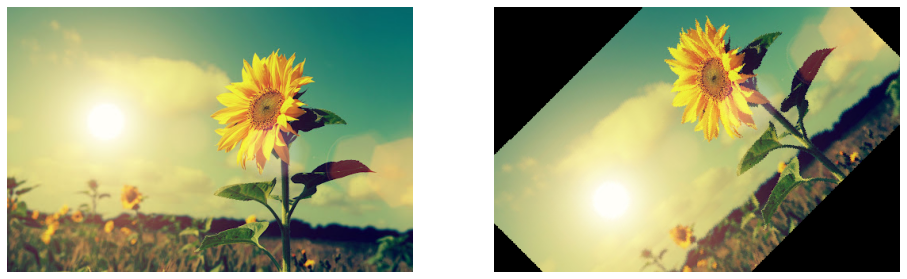

In [39]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW1.3/sun.jpg')
rot_img = rotate(img, change_angle_to_radius_uint(45), (img.shape[1]//2, img.shape[0]//2), img.shape[:2])
fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(rot_img)
plt.axis('off')

plt.show()

**YÊU CẦU 2**

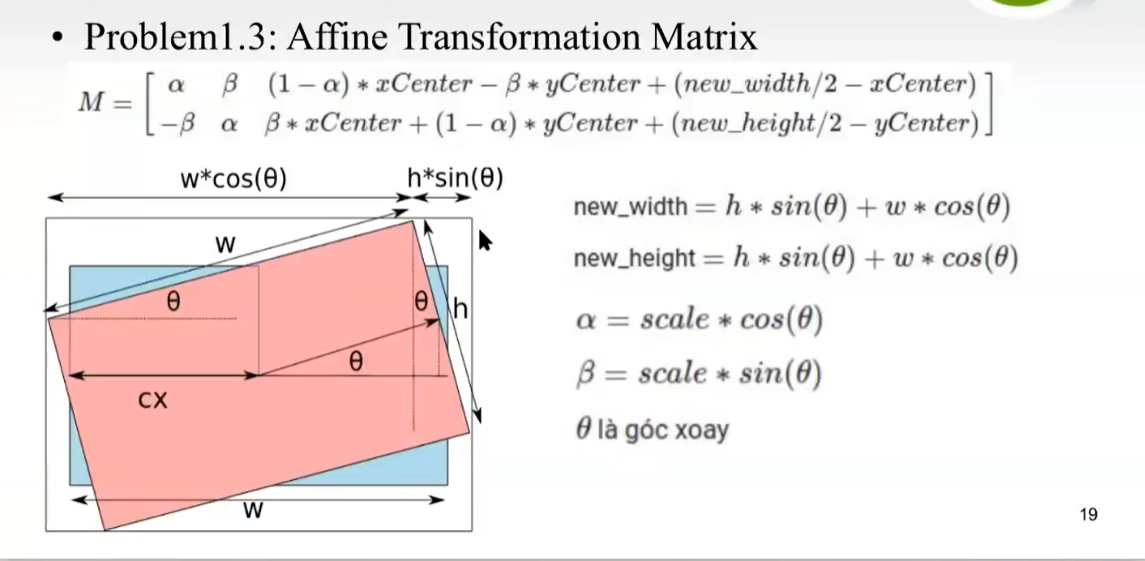

In [40]:
def rotate_bound(image, angle):
  (h, w) = image.shape[:2]
  (cX, cY) = (w//2, h//2)

  # Lấy affine transformation matrix M trong trường hợp xoay và bị cắt mất ảnh
  M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

  # Lấy các giá trị cần cho việc chỉnh sửa M để xoay không bị cắt ảnh
  # Lấy alpha và beta
  cos = np.abs(M[0, 0])
  sin = np.abs(M[0, 1])

  # Tính toán size của ảnh output sau khi xoay
  nW = int((h * sin) + (w * cos))
  nH = int((h * cos) + (w * sin))

  # Thay đổi M để xoay không bị cắt mất ảnh
  M[0, 2] += (nW / 2) - cX
  M[1, 2] += (nH / 2) - cY
  
  # Xoay ảnh dựa trên M
  return cv2.warpAffine(image, M, (nW, nH))


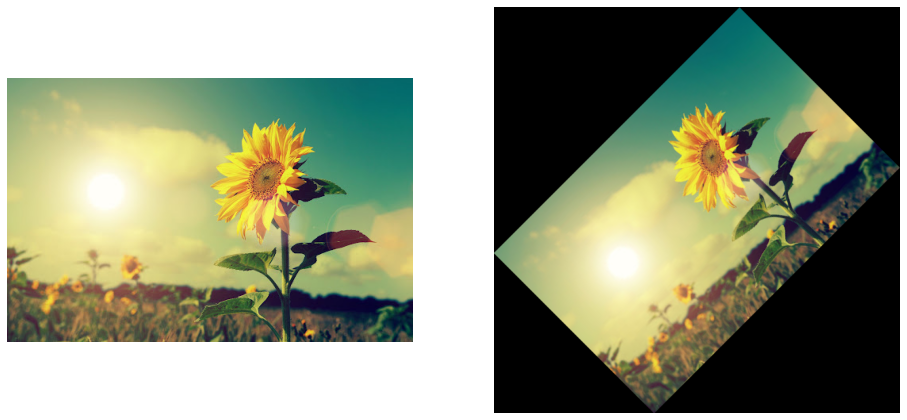

In [41]:

import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW1.3/sun.jpg')
rot_img = rotate_bound(img, 45)
fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(rot_img)
plt.axis('off')

plt.show()

## HW2

Viết chương trình sử dụng kỹ thuật background substraction để trích xuất forgeground (object mong muốn) và dán vào background mới. 

- Input: 3 ảnh **Background 1**, **Background 2**, **Observed image**

- Output: là ảnh mới khi trích xuất object từ **Observed image** và dán vào **Background 2**

- **Gợi Ý:**
    - Đưa cả 3 ảnh về cùng kích thước
    - Dùng background substraction với **Observed image** và **Background 1** để lấy mask object (object ở đây là người MC mặc áo đỏ)
    - Mask object là ảnh binary (Foreground Mask) sẽ gồm 2 giá trị: 0 là background, 1 các vùng pixel chứa object.
    - Tạo ra ảnh output (New image) vị trí pixel nào = 1 thì lấy giá trị của **Observed image** và vị trí nào = 0 thì lấy giá trị của **Background 2**

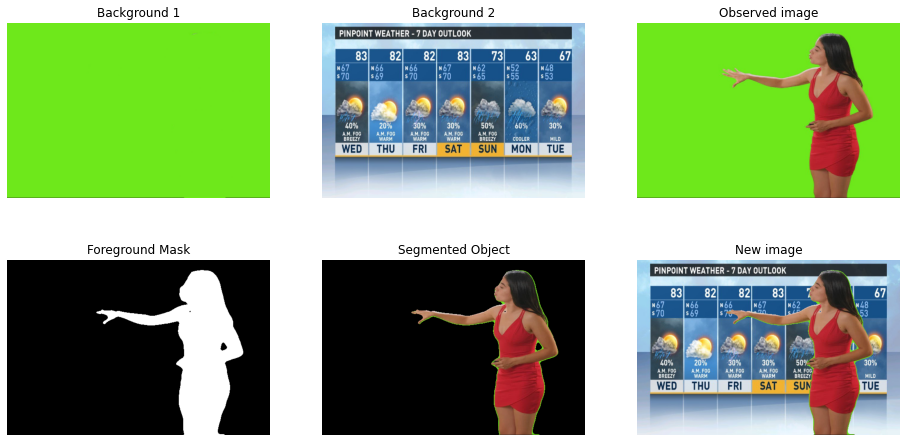

**SOLUTION**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


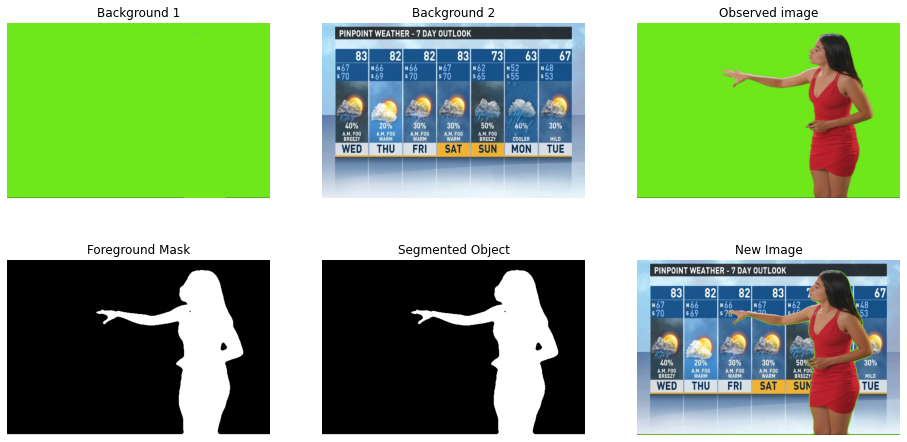

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bg_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW2/background4.png'
new_bg_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW2/weather_forecast.jpg'
obs_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW2/pg4.png'

def preprocessing_image(image_path, denoising=True, img_size=(600, 400)):
  image = cv2.imread(image_path)

  # Cần phải resize các ảnh về cùng kích thước
  rez_image = cv2.resize(image, img_size)
  gray_image = cv2.cvtColor(rez_image, cv2.COLOR_BGR2GRAY)

  # Sử dụng gausian blur để hạn chế nhiễu
  if denoising:
    gray_image = cv2.GaussianBlur(gray_image, (5, 5), (0))
  return rez_image, gray_image

def gray_diff(bg_path, obs_path, new_bg_path, img_size=(600, 400)):
  # Preprocessing image
  bg_img, gray_bg_img = preprocessing_image(bg_path, denoising=False, img_size=img_size)
  obs_img, gray_obs_img = preprocessing_image(obs_path, denoising=True, img_size=img_size)
  new_bg_img, gray_new_bg_img = preprocessing_image(new_bg_path, denoising=False, img_size=img_size)

  # Tính absolute khác biệt giữa ảnh có object và background 1
  difference = cv2.absdiff(gray_bg_img, gray_obs_img)

  # Tạo ảnh binary giá trị < 10 sẽ được assgin = 0, giá trị > 10 sẽ được assign = 255
  _, mask = cv2.threshold(difference, thresh=10, maxval=255, type=cv2.THRESH_BINARY)

  # Dùng median blur giảm nhiễu 
  mask = cv2.medianBlur(mask, 9)

  # Tạo ảnh mask 3 channels để dùng cho ảnh color hiện tại có 3 channels (B, G, R)
  # đưa về 2 giá trị 0: background, 1: forgeground
  mask_3dims = np.expand_dims(np.where(mask > 0, 1, 0), axis = 2) * np.ones((img_size[1], img_size[0], 3))

  # Giúp lấy ảnh object (phục vụ debug)
  seg_obj = mask_3dims * obs_img

  # Dùng mask 3 channels để dán object vào background mới
  masked_img = np.where(mask_3dims == 0, new_bg_img, obs_img)

  return bg_img, new_bg_img, obs_img, mask_3dims*255, seg_obj, masked_img
  # return gray_bg_img, gray_obs_img, gray_new_bg, mask_3dims*255, seg_obj, mased_img

# bg_img,  obs_img, new_bg_img, massk_3dims, seg_obj, masked_img
results = gray_diff(bg_path, obs_path, new_bg_path, img_size=(600, 400))

fig = plt.figure(figsize=(16, 8))
name_list = ['Background 1', 'Background 2', 'Observed image', 'Foreground Mask', 'Segmented Object', 'New Image']

for idx, img in enumerate(results):
  fig.add_subplot(2, 3, idx + 1)
  plt.title(name_list[idx])
  plt.axis('off')
  plt.imshow(results[idx][..., ::-1])

plt.show()

Thường được sử dụng cho video và được sử dụng trong các ứng dụng như traffic analysis, people detection, tracking of animals.

Một số cách tìm background khác 
* Mean Filter
* Median Filter

## HW3

Viết chương trình tìm kiếm **n** ảnh (trong tập fruit datasset) có đặc điểm tương tự với ảnh input nhất. Sử dụng **cosine similarity** để so sánh các ảnh với nhau.

VD:

Input: test image 

Ouput: top **n**=5 ảnh có đặc điểm tương tự như như ảnh test image

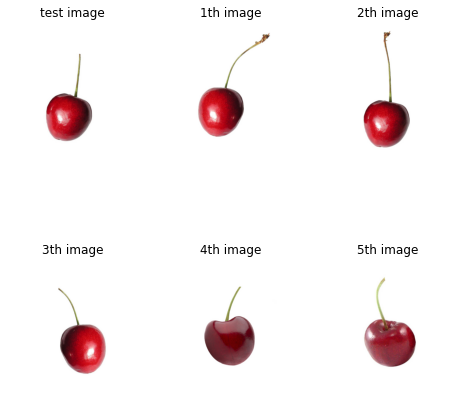

**SOLUTION**

In [43]:
!pip install sklearn

In [94]:
import cv2 
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def cal_hist(image):
  rez_image = cv2.resize(image, (600, 600))
  gray_image = cv2.cvtColor(rez_image, cv2.COLOR_BGR2GRAY)
  histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
  return histogram

def cal_cos_sim(image1, image2):
  a = image1.flatten()
  b = image2.flatten()
  cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
  return cos_sim

def find_similar_imgs(test_image_path, images_dir, num_img=5):
  # Tính histogram cho toàn bộ tập data
  list_img_path = np.array(os.listdir(images_dir)) # List tên ảnh\
  i = 1
  list_hist_img = [cal_hist(cv2.imread(os.path.join(images_dir, img_path))) for img_path in list_img_path]

  # Tính histogram cho ảnh test
  test_image = cv2.imread(test_image_path)
  hist_test_image = cal_hist(test_image)

  # Tính cosine similarity giữa ảnh test với toàn bộ ảnh trong dataset
  # Sắp xếp consine similarity và lấy các n (num_img) ảnh có giá trị lớn nhất
  list_scores = [cal_cos_sim(hist_test_image, hist_img) for hist_img in list_hist_img]

  # Sắp xếp từ bé đến lớn dùng [::-1] để đảo ngược từ lớn đến bé
  # Lấy num_img + 1 do ở đây mình lấy ảnh test trogn tập data nên ảnh có consine similarity lớn nhất chính là ảnh test
  top_similar_images = np.argsort(list_scores)[::-1][:num_img+1]

  return list_img_path[top_similar_images]


1 (53).jpg
1 (101).jpg
1 (147).jpg
1 (18).jpg
1 (84).jpg
1 (93).jpg


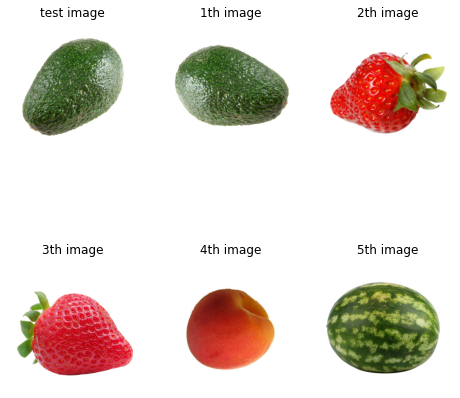

In [98]:
test_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW3/fruits/1 (53).jpg'
images_dir = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW3/fruits/'
top_similar_images_path = find_similar_imgs(test_image_path, images_dir, num_img=5)

fig = plt.figure(figsize=(8, 8))

for idx_img, img_path in enumerate(top_similar_images_path):
  fig.add_subplot(2, 3, idx_img+1)
  if idx_img == 0:
    name = 'test image'
  else:
    name = "{}th image".format(idx_img)
  plt.title(name)
  plt.axis('off')
  print(img_path)
  img = cv2.imread(os.path.join(images_dir, img_path))
  plt.imshow(img[...,::-1])
plt.show()

In [101]:
test_image = cv2.imread(test_image_path)
hist_test_image = cal_hist(test_image)
hist_test_image.shape

(256, 1)

## HW4

Viết một function trả về disparity map từ 2 ảnh đầu vào (left và right image) dựa trên các stereo matching algorithm sau:
- SAD (Sum of Absolute Differences)
- SSD (Sum of Squred Differences)
- Cosine similarity 

Input: left image, right image, maximum disparity (chính là range d trong bài giảng, là khoảng cách mà window sẽ trượt trên một ảnh để so sánh độ tương đồng với vùng của ảnh còn lại), windown size và tên thuật toán

Output: Disparity map 

- Khi tăng windown size thì việc gì sẽ xảy ra?
- Kết quả của SAD và SSD có gì khác nhau?


Ảnh dưới là ví dụ ouput khi dùng SSD

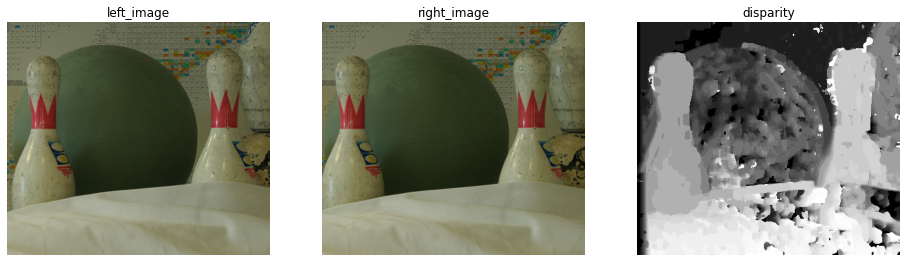

Thuật toán của stereo matching:

$d_p =  \underset{d \in D}{\mathrm{argmax}}(C(p,q))$

$q = (x_p - d, y_p)$

- **SAD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}|L(u)-R(v)|$ 

- **SSD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}(L(u)-R(v))^2$ 

- **Cosine similarity**: $C(p,q) =  cs(W_p, W_q)$ 

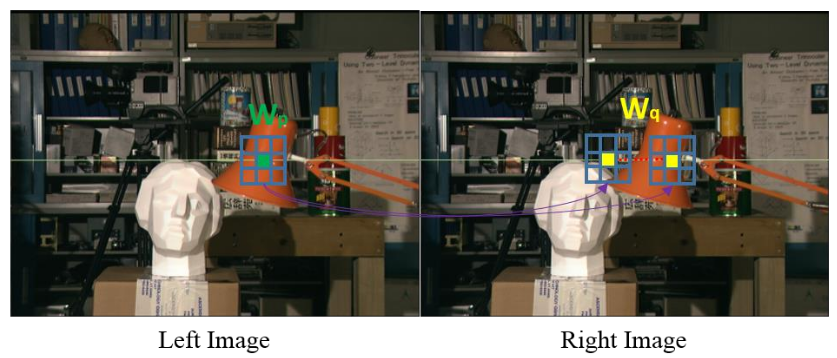

**SOLUTION**

In [122]:
import cv2 
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

def preprocess_frame(path):
  orig_image = cv2.imread(path)
  gray_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
  image = cv2.equalizeHist(gray_image) # Làm cho contract tốt hơn
  image = cv2.GaussianBlur(image, (5, 5), 0)
  return orig_image, image

def calculate_disparity_matrix(left_image_path, right_image_path, maximum_disparity, window_size, algorithm_name):
  # Tiền xử lý giảm nhiễu
  orig_left_image, left_image = preprocess_frame(left_image_path)
  orig_right_image, right_image = preprocess_frame(right_image_path)

  # Tạo kernel (sliding window)
  kernel = np.ones([window_size, window_size]) / window_size

  # Tạo ra disparity_maps có channels = d (maximum_disparity)
  disparity_maps = np.zeros([left_image.shape[0], left_image.shape[1], maximum_disparity])

  for d in range(0, maximum_disparity):
    # shift ảnh right_image từ trái sang phải max step là d theo chiều x
    translation_matrix = np.float32([[1, 0, d], [0, 1, 0]])
    shifted_image = cv2.warpAffine(right_image, translation_matrix,
                                   (right_image.shape[1], right_image.shape[0]))
    
    if algorithm_name == 'SAD':
      # Tính abs differences với từng ảnh được shift
      SAD = abs(np.float32(left_image) - np.float32(shifted_image))
      # Dùng kernel để tính SAD cho mỗi điểm ảnh
      filtered_image = cv2.filter2D(SAD, -1, kernel)

    elif algorithm_name == 'SSD':
      # Calculate  squared differences 
      SSD = np.float32(left_image) - np.float32(shifted_image)
      SSD = SSD**2
      # Dùng kernel để tính SSD cho mỗi điểm ảnh
      filtered_image = cv2.filter2D(SSD, -1, kernel)
    elif algorithm_name == 'Cosine Similarity':
      # Tính dot product của hai ảnh
      multiplied_matrix = np.float32(left_image) * np.float32(shifted_image)
      numerator = cv2.filter2D(multiplied_matrix, -1, kernel)

      # Tính tích norm 2 của 2 ảnh
      squared_norm_left = cv2.filter2D(np.float32(left_image)**2, -1, kernel)
      squared_norm_right = cv2.filter2D(np.float32(right_image)**2, -1, kernel)
      denominator = np.sqrt(squared_norm_left*squared_norm_right) + 1e-6

      # Tính consine similarity cho từng điểm ảnh
      filtered_image = numerator/denominator
    else:
      raise Exception('Wrong Algorithm Name')

    disparity_maps[:, :, d] = filtered_image
  
  if algorithm_name == 'Cosine Similarity':
    # Cosine similarity cần tìm max (giống nhau nhất)
    # Mình cần lấy vị trí chứ không phải giá trị
    disparity = np.argmax(disparity_maps, axis=2)
    # Scale về giá trị ảnh thực
    disparity = np.uint8(disparity * 255 / maximum_disparity)
    disparity = cv2.equalizeHist(disparity)
  else:
    # SAD, SSD cần tìm min (giống nhau nhất)
    disparity = np.argmin(disparity_maps, axis=2)
    # Scale về giá trị ảnh thực
    disparity = np.uint8(disparity * 255 / maximum_disparity)
    disparity = cv2.equalizeHist(disparity)
  
  return orig_left_image, orig_right_image, disparity

**Cosine Similarity**


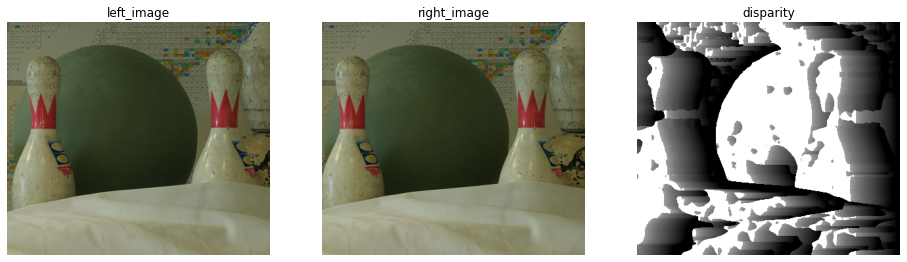

In [125]:

left_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/left.png'
right_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/right.png'
maximum_disparity = 64
window_size = 9
algorithm_name = 'Cosine Similarity'

orig_left_image, orig_right_image, disparity = calculate_disparity_matrix(left_image_path,
                                                                          right_image_path,
                                                                          maximum_disparity,
                                                                          window_size,
                                                                          algorithm_name)

fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 3, 1)
plt.title('left_image')
plt.axis('off')
plt.imshow(orig_left_image[...,::-1])

fig.add_subplot(1, 3, 2)
plt.title('right_image')
plt.axis('off')
plt.imshow(orig_right_image[...,::-1])

fig.add_subplot(1, 3, 3)
plt.title('disparity')
plt.axis('off')
plt.imshow(disparity[...,::-1], cmap='gray')

plt.show()



**SAD**

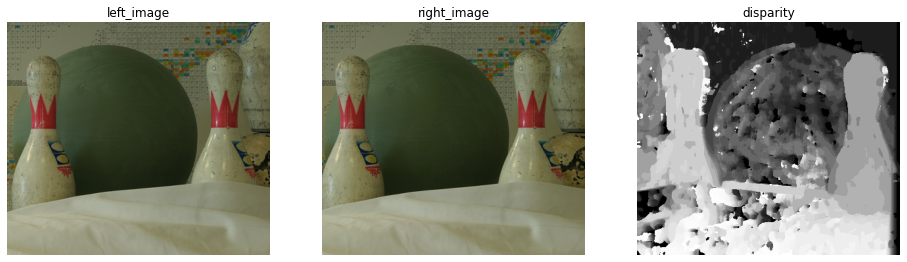

In [126]:

left_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/left.png'
right_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/right.png'
maximum_disparity = 64
window_size = 9
algorithm_name = 'SAD'

orig_left_image, orig_right_image, disparity = calculate_disparity_matrix(left_image_path,
                                                                          right_image_path,
                                                                          maximum_disparity,
                                                                          window_size,
                                                                          algorithm_name)

fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 3, 1)
plt.title('left_image')
plt.axis('off')
plt.imshow(orig_left_image[...,::-1])

fig.add_subplot(1, 3, 2)
plt.title('right_image')
plt.axis('off')
plt.imshow(orig_right_image[...,::-1])

fig.add_subplot(1, 3, 3)
plt.title('disparity')
plt.axis('off')
plt.imshow(disparity[...,::-1], cmap='gray')

plt.show()

**SSD**

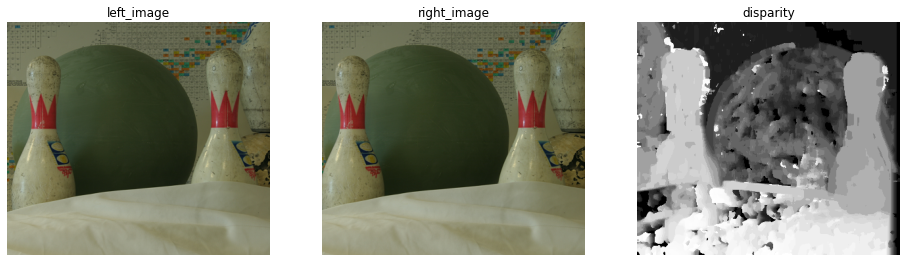

In [127]:

left_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/left.png'
right_image_path = '/content/drive/MyDrive/ColabNotebooks/EX8/Exercise8_Data/HW4/right.png'
maximum_disparity = 64
window_size = 9
algorithm_name = 'SSD'

orig_left_image, orig_right_image, disparity = calculate_disparity_matrix(left_image_path,
                                                                          right_image_path,
                                                                          maximum_disparity,
                                                                          window_size,
                                                                          algorithm_name)

fig = plt.figure(figsize=(16, 16))
fig.add_subplot(1, 3, 1)
plt.title('left_image')
plt.axis('off')
plt.imshow(orig_left_image[...,::-1])

fig.add_subplot(1, 3, 2)
plt.title('right_image')
plt.axis('off')
plt.imshow(orig_right_image[...,::-1])

fig.add_subplot(1, 3, 3)
plt.title('disparity')
plt.axis('off')
plt.imshow(disparity[...,::-1], cmap='gray')

plt.show()